# Unidad 5. Procesado de imagen. Métodos clásicos.



Configuramos el entorno

In [12]:
import numpy as np
import cv2 as cv
print (cv .__version__)
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure 
figure(figsize=(10, 8), dpi=80)

4.7.0


<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

Transformaciones básicas

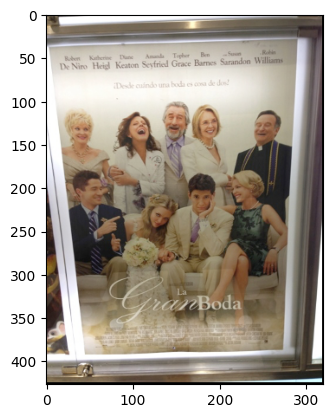

In [16]:
#Cargamos una imagen
imgSrc = cv.imread('./Image search engine2/DB5.png', 1)
# TODO
imgSrc = cv.cvtColor(imgSrc, cv.COLOR_BGR2RGB)
#plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(imgSrc)

In [17]:
#Print de parte de la imagen (Fila 50, columnas de la 1 a la 10)
pixels = imgSrc[50, 1:20]
print(pixels)
# TODO

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [250 250 248]
 [205 204 200]
 [207 204 197]
 [208 205 196]
 [209 203 195]
 [210 205 196]
 [210 205 195]
 [209 202 194]
 [209 203 193]
 [210 203 194]
 [209 202 191]
 [210 204 193]
 [213 207 194]
 [213 207 194]
 [210 204 192]
 [213 206 195]]


Text(0.5, 1.0, 'Crop')

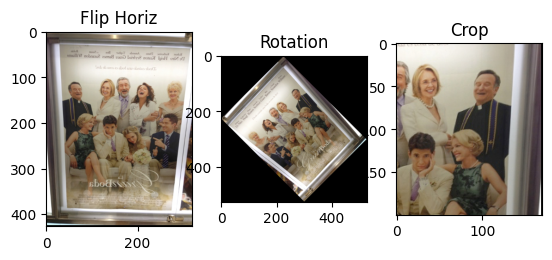

In [19]:
#Vamos a "jugar" con la imagen. Flip, Rotación, Crop
#Creamos una figura con 3 columnas. En cada elemento, dibujaremos el resultado de la operación
f, axarr = plt.subplots(1,3)
# TODO

#Flip horizontal
# TODO
imgFlipH = cv.flip(imgSrc, 1)
axarr[0].imshow(imgFlipH)
axarr[0].set_title('Flip Horiz')

#Rotación 45º
from scipy import ndimage
# TODO
imgRot = ndimage.rotate(imgSrc, 45)
axarr[1].imshow(imgRot)
axarr[1].set_title('Rotation')
#Recorte (crop) 80:280, 150:330
# TODO
imgCrop = imgSrc[80:280, 150:330]
axarr[2].imshow(imgCrop)
axarr[2].set_title('Crop')


Operaciones básicas

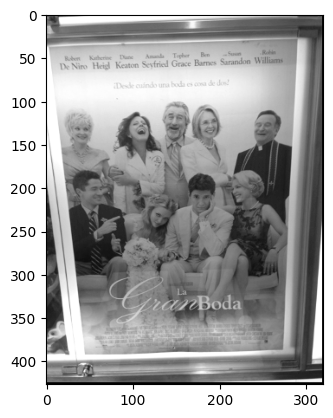

In [20]:
#Conversión a escala de grises
# TODO
imgGray = cv.cvtColor(imgSrc, cv.COLOR_RGB2GRAY)
plt.imshow(imgGray, cmap = 'gray', vmin = 0, vmax = 255)


<function matplotlib.pyplot.show(close=None, block=None)>

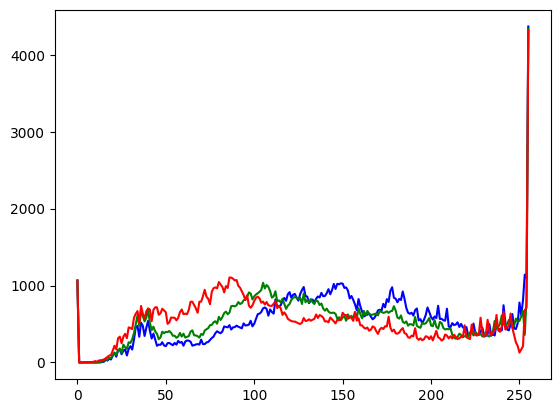

In [21]:
#Cálculo del Histograma
# TODO
#src[:,:,2]
color = ('b', 'g', 'r')
for i, col in enumerate(color):
  histr = cv.calcHist([imgSrc], [i], None, [256], [0, 256])
  plt.plot(histr, color = col)
plt.show

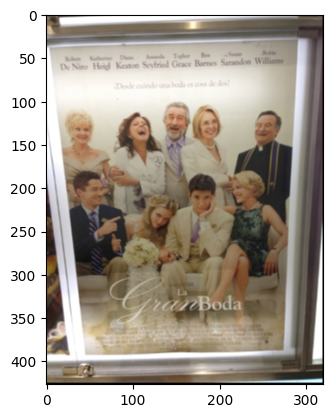

In [22]:
#Emborronado
# TODO
imgBlurred = cv.blur(imgSrc, (2, 2))
plt.imshow(imgBlurred)


Ejemplo 1: Segmentación por umbralización

C:\Users\GoldTech\AppData\Local\Temp\ipykernel_24680\2654155035.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')


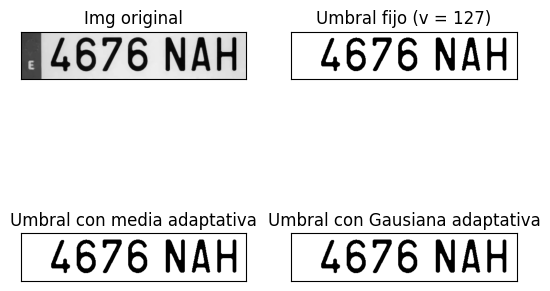

In [23]:
#Dada una imagen de una matrícula de coche, queremos segmentar el fondo del primer plano, para quedarnos con los números

# imgM: Cargamos imagen
# TODO
imgSrcMatricula = cv.imread('./Fundamentals/matricula.jpeg', cv.IMREAD_GRAYSCALE)
plt.imshow(imgSrcMatricula, cmap = 'gray')

# imgMBlur: Suavizamos para eliminar ruido
# TODO
imgMBlur = cv.medianBlur(imgSrcMatricula, 5)

# imgTh1: Segmentación con umbral fijo
# TODO
ret, imgTh1 = cv.threshold(imgMBlur, 60, 255, cv.THRESH_BINARY)

# imgTh2: Segmentación por umbral adaptativo (media)
# TODO
imgTh2 = imgTh1

# imgTh3: Segmentación por umbral adaptativo (gausiana)
# TODO
imgTh3 = imgTh1

titles = ['Img original', 'Umbral fijo (v = 127)', 'Umbral con media adaptativa', 'Umbral con Gausiana adaptativa']

images = [imgMBlur, imgTh1, imgTh2, imgTh3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Operaciones avanzadas

In [ ]:
#Segmentación (Connected components)

# Ejercicio voluntario: Utilizar la función de Opencv llamada Connected Components para obtener número a número,
# todos los elementos de la matrícula por separado. Podéis utilizar imgTh1, imgTh2 o imgTh3 como punto de partida
# y re-ajustar los parámetros de pre-procesado según necesitéis. Se valorará la autonomía del método, es decir, 
# cuanto mejor generalice el problema y menos intervenga un operario en ajustar parámetros, mejor


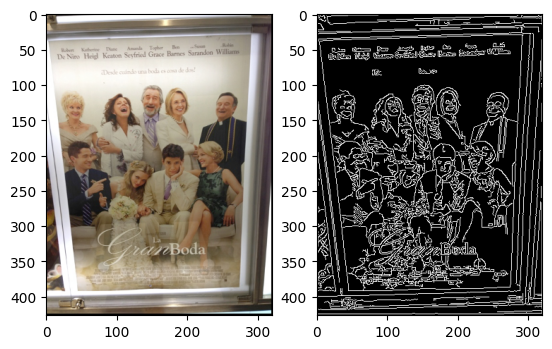

In [24]:
#Filtro bordes Canny, sobre la imagen imgSrc
# TODO
edges = cv.Canny(imgSrc, 10, 200)
plt.subplot(121), plt.imshow(imgSrc, cmap = 'gray')
plt.subplot(122), plt.imshow(edges, cmap = 'gray')
plt.show()


¡Por fin! 
Vamos ya con nuestro algoritmo de matching de imágenes :)


Ejemplo 2: Matching de imágenes con SIFT, FLANN y Homografía

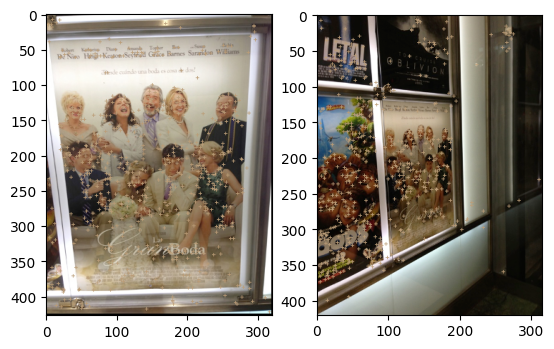

In [25]:
def draw_cross_keypoints(img, keypoints, color):
    """ Draw keypoints as crosses, and return the new image with the crosses. """
    img_kp = img.copy()  # Create a copy of img

    # Iterate over all keypoints and draw a cross on evey point.
    for kp in keypoints:
        x, y = kp.pt  # Each keypoint as an x, y tuple  https://stackoverflow.com/questions/35884409/how-to-extract-x-y-coordinates-from-opencv-cv2-keypoint-object

        x = int(round(x))  # Round an cast to int
        y = int(round(y))

        # Draw a cross with (x, y) center
        cv.drawMarker(img_kp, (x, y), color, markerType=cv.MARKER_CROSS, markerSize=5, thickness=1, line_type=cv.LINE_8)

    return img_kp  # Return the image with the drawn crosses.

def pinta_puntos_clave(img1_color, kp1, img2_color, kp2):
  
  img1_color = draw_cross_keypoints(img1_color, kp1, color=(120,157,187))  # Draw keypoints as "+" signs
  img1_color = cv.cvtColor(img1_color, cv.COLOR_BGR2RGB)

  img2_color = draw_cross_keypoints(img2_color, kp2, color=(120,157,187))  # Draw keypoints as "+" signs
  img2_color = cv.cvtColor(img2_color, cv.COLOR_BGR2RGB)

  plt.subplot(121),plt.imshow(img1_color)
  plt.subplot(122),plt.imshow(img2_color)



#Parámetros
MIN_MATCH_COUNT = 10    # Mínimo número de parejas por imagen
FLANN_INDEX_KDTREE = 1  # Ár

#Cargamos las imágenes en RGB
# TODO
img1_color = cv.imread('./Image search engine2/DB5.png', 1)
img2_color = cv.imread('./Image search engine2/test6c.png', 1)

#Convertimos a Gris
# TODO
img1 = cv.cvtColor(img1_color, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2_color, cv.COLOR_BGR2GRAY)

# Inicializamos el detector y descriptor SIFT (Scale-Invariant Feature Transform)
# TODO
sift = cv.SIFT_create()

# Detectamos los puntos clave (kpX) y los describimos (desX)
# TODO
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Pintamos los puntos clave
# TODO
pinta_puntos_clave(img1_color, kp1, img2_color, kp2)

# Realizamos el emparejado de puntos con el método FLANN knn
# TODO
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)


# Almacenamos los matches buenos, según la función ratio de distancias de Lowe
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

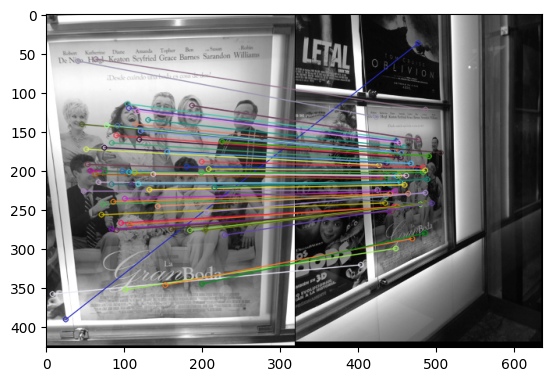

In [26]:
#-- Pintamos los emparejamientos (matches)
# TODO
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8) #inicializamos la matriz
cv.drawMatches(img1, kp1, img2, kp2, good, img_matches, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)



In [27]:
#-- Pintamos los emparejamientos (matches) que cumplen la Homografía
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    #Calculamos la Homografía y quitamos los outliers
    # TODO
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    print(M)
    matchesMask = mask.ravel().tolist()
else:
    print( "No hay suficientes parejas - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

[[ 5.28306682e-01 -6.43700808e-02  8.65386261e+01]
 [ 1.55978506e-01  4.54273518e-01  9.93801619e+01]
 [ 1.01935310e-03 -5.25235578e-04  1.00000000e+00]]


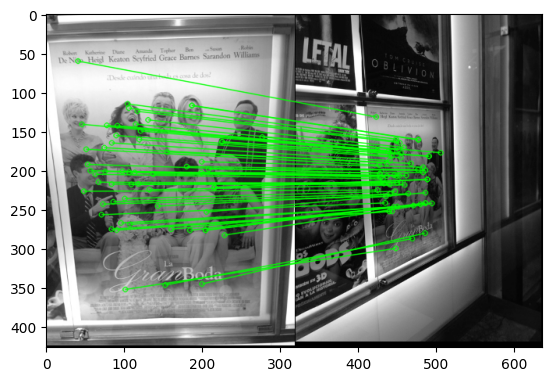

(<matplotlib.image.AxesImage at 0x195ebcc0150>, None)

In [28]:
# Pintamos los matches (drawMatches)
# TODO
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask =  matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()